In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
from matplotlib.patches import Patch
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm


import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv(r'C:\Users\Mohamed Fawzi\Desktop\Iris Analysis\01_iris.csv')

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Inspecting Data:

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [89]:
# checking for null values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [90]:
# checking for duplicates
df.duplicated().sum()

3

In [91]:
# dropping duplicates
df.drop_duplicates(inplace=True)

## Exploratory Data Analysis (EDA):

-   General Statistics Summary:

In [92]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


-   Species Specific Statistics:

In [93]:
df.groupby('species').describe()

sepal_length                                               \
                  count      mean       std  min  25%  50%  75%  max   
species                                                                
setosa             48.0  5.010417  0.359219  4.3  4.8  5.0  5.2  5.8   
versicolor         50.0  5.936000  0.516171  4.9  5.6  5.9  6.3  7.0   
virginica          49.0  6.604082  0.632113  4.9  6.3  6.5  6.9  7.9   

           sepal_width            ... petal_length      petal_width            \
                 count      mean  ...          75%  max       count      mean   
species                           ...                                           
setosa            48.0  3.431250  ...          1.6  1.9        48.0  0.250000   
versicolor        50.0  2.770000  ...          4.6  5.1        50.0  1.326000   
virginica         49.0  2.979592  ...          5.9  6.9        49.0  2.028571   

                                               
                 std  min  25%  50%  75%  max  
species                                        
setosa      0.105185  0.1  0.2  0.2  0.3  0.6  
versicolor  0.197753  1.0  1.2  1.3  1.5  1.8  
virginica   0.276887  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

###   Correlation Analysis:

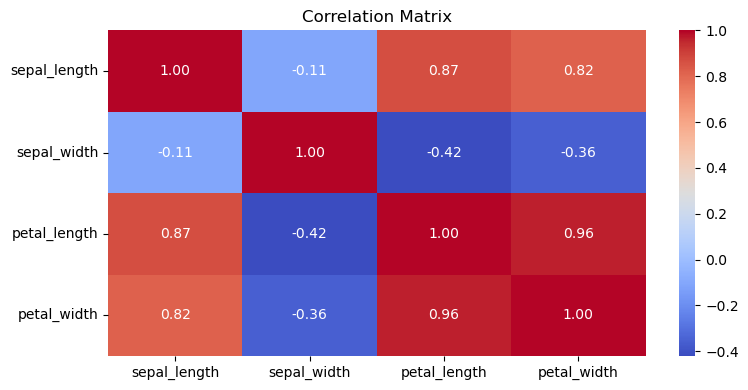

In [94]:
numeric_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix,
            annot=True,
            cmap='coolwarm',
            fmt=".2f"
            )
plt.title('Correlation Matrix')

plt.tight_layout()
plt.show()

###     Distribution Analysis

#### Sepal Length & Width Distribution


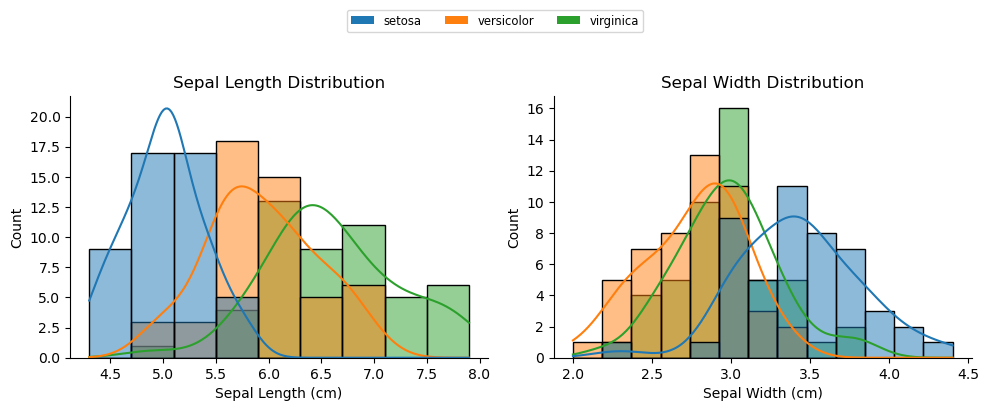

In [95]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

palette = sns.color_palette('tab10')
species = df['species'].unique()

hist1 = sns.histplot(
    data=df,
    x='sepal_length',
    kde=True,
    ax=axes[0],
    hue='species',
    palette=palette
)
axes[0].set_title('Sepal Length Distribution')
axes[0].set_xlabel('Sepal Length (cm)')

axes[0].get_legend().remove()

hist2 = sns.histplot(
    data=df,
    x='sepal_width',
    kde=True,
    ax=axes[1],
    hue='species',
    palette=palette,
    legend=False
)
axes[1].set_title('Sepal Width Distribution')
axes[1].set_xlabel('Sepal Width (cm)')

handles = [Patch(facecolor=palette[i], label=species[i]) for i in range(len(species))]

fig.legend(
    handles,
    [str(s) for s in species],
    loc='upper center',
    bbox_to_anchor=(0.5, 1.03),
    ncol=len(species),
    fontsize='small'
)

sns.despine()
plt.tight_layout()
plt.subplots_adjust(top=0.8)  # Make space for the legend
plt.show()


#### Petal Length & Width Distribution

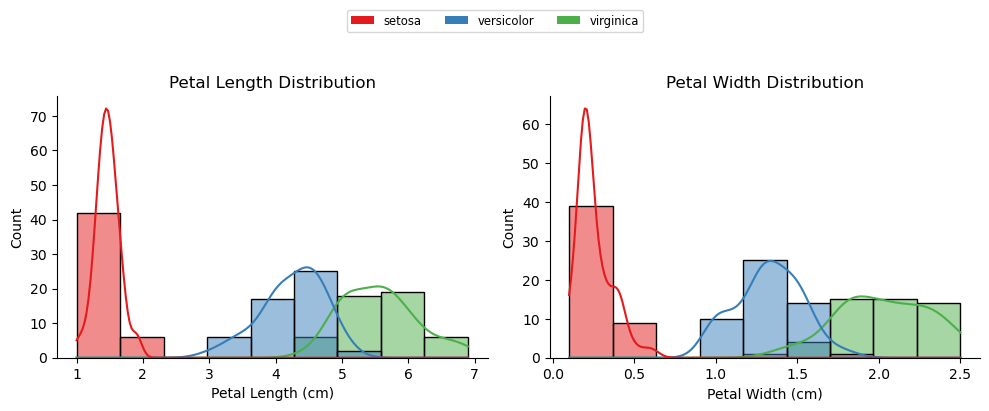

In [96]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

palette = sns.color_palette('Set1')
species = df['species'].unique()

hist1 = sns.histplot(
    data=df,
    x='petal_length',
    kde=True,
    ax=axes[0],
    hue='species',
    palette=palette
)
axes[0].set_title('Petal Length Distribution')
axes[0].set_xlabel('Petal Length (cm)')

axes[0].get_legend().remove()

hist2 = sns.histplot(
    data=df,
    x='petal_width',
    kde=True,
    ax=axes[1],
    hue='species',
    palette=palette,
    legend=False
)
axes[1].set_title('Petal Width Distribution')
axes[1].set_xlabel('Petal Width (cm)')

handles = [Patch(facecolor=palette[i], label=species[i]) for i in range(len(species))]

fig.legend(
    handles,
    [str(s) for s in species],
    loc='upper center',
    bbox_to_anchor=(0.5, 1.03),
    ncol=len(species),
    fontsize='small'
)

sns.despine()
plt.tight_layout()
plt.subplots_adjust(top=0.8)  # Make space for the legend
plt.show()


### Outliers

#### Sepal Length & Width Outliers

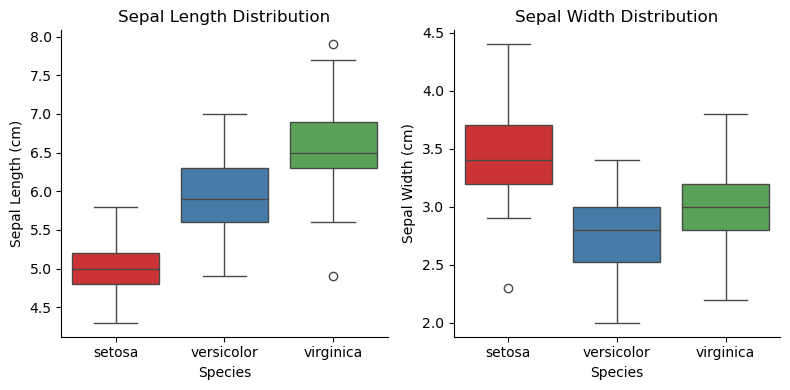

In [97]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
sns.boxplot(
    data=df,
    x='species',
    y='sepal_length',
    ax=axes[0],
    palette='Set1'
)
axes[0].set_title('Sepal Length Distribution')
axes[0].set_xlabel('Species')
axes[0].set_ylabel('Sepal Length (cm)')

sns.boxplot(
    data=df,
    x='species',
    y='sepal_width',
    ax=axes[1],
    palette='Set1'
)
axes[1].set_title('Sepal Width Distribution')
axes[1].set_xlabel('Species')
axes[1].set_ylabel('Sepal Width (cm)')


sns.despine()
plt.tight_layout()
plt.show()

#### Sepal Length & Width Outliers


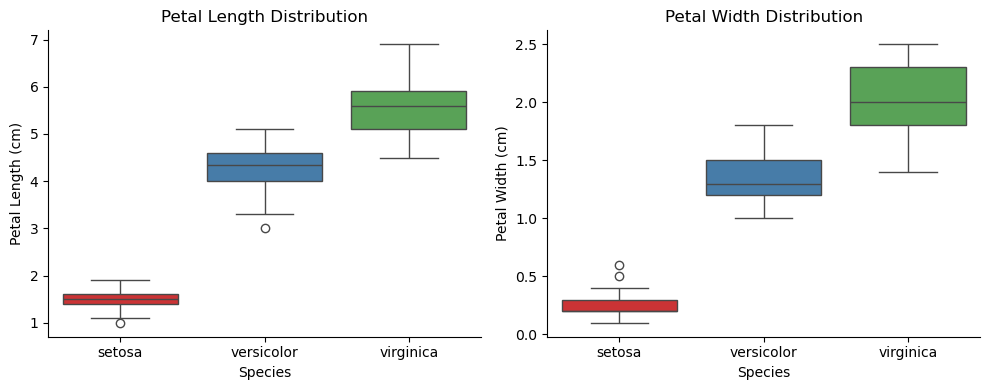

In [98]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.boxplot(
    data=df,
    x='species',
    y='petal_length',
    ax=axes[0],
    palette='Set1'
)
axes[0].set_title('Petal Length Distribution')
axes[0].set_xlabel('Species')
axes[0].set_ylabel('Petal Length (cm)')

sns.boxplot(
    data=df,
    x='species',
    y='petal_width',
    ax=axes[1],
    palette='Set1'
)
axes[1].set_title('Petal Width Distribution')
axes[1].set_xlabel('Species')
axes[1].set_ylabel('Petal Width (cm)')


sns.despine()
plt.tight_layout()
plt.show()
#


### Scatter Plot Matrix

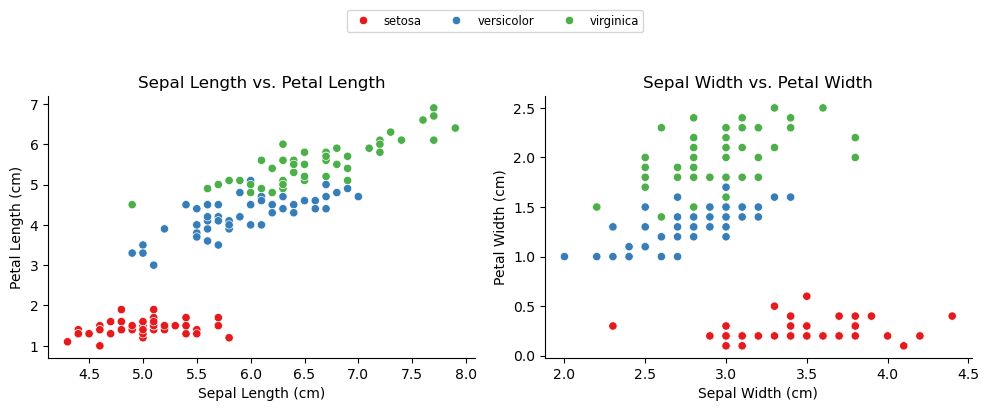

In [99]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

scatter1 = sns.scatterplot(
    data=df,
    x='sepal_length',
    y='petal_length',
    hue='species',
    palette='Set1',
    ax=axes[0]
)
axes[0].set_title('Sepal Length vs. Petal Length')
axes[0].set_xlabel('Sepal Length (cm)')
axes[0].set_ylabel('Petal Length (cm)')

handles, labels = scatter1.get_legend_handles_labels()

axes[0].get_legend().remove()

scatter2 = sns.scatterplot(
    data=df,
    x='sepal_width',
    y='petal_width',
    hue='species',
    palette='Set1',
    ax=axes[1],
    legend=False
)
axes[1].set_title('Sepal Width vs. Petal Width')
axes[1].set_xlabel('Sepal Width (cm)')
axes[1].set_ylabel('Petal Width (cm)')

fig.legend(
    handles, 
    labels, 
    loc='upper center', 
    bbox_to_anchor=(0.5, 1.03),
    ncol=len(labels),
    fontsize='small'
)

sns.despine()

plt.tight_layout()
plt.subplots_adjust(top=0.8) 
plt.show()


### Selecting Features for Regression Analysis

-   Predection the petal length using the sepal_length and witdth

In [100]:
X = df[['sepal_length', 'sepal_width']]  #features
y = df['petal_length']                   #target

In [101]:
#splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [125]:
#using scukit-learn's LinearRegression model for prediction
model = LinearRegression()
model.fit(X_train, y_train)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [ 1.80438018 -1.30611191]
Intercept: -2.8123264432381676


In [ ]:
#using statsmodels for detailed regression analysis
X_train_sm = sm.add_constant(X_train)  
sm_model = sm.OLS(y_train, X_train_sm).fit()

sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           petal_length   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     395.6
Date:                ter, 27 mai 2025   Prob (F-statistic):           5.13e-52
Time:                        16:52:34   Log-Likelihood:                -110.84
No. Observations:                 117   AIC:                             227.7
Df Residuals:                     114   BIC:                             236.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -2.8123      0.628     -4.478      0.000      -4.056      -1.568
sepal_length     1.8044      0.072     25.070      0.000       1.662       1.947
sepal_width     -1.3061      0.134     -9.761      0.000      -1.571      -1.041
==============================================================================
Omnibus:                        2.441   Durbin-Watson:                   2.150
Prob(Omnibus):                  0.295   Jarque-Bera (JB):                2.286
Skew:                           0.261   Prob(JB):                        0.319
Kurtosis:                       2.556   Cond. No.                         74.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
y_pred = model.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))

Mean Squared Error: 0.4952016809380731
R-squared: 0.8308153191773624


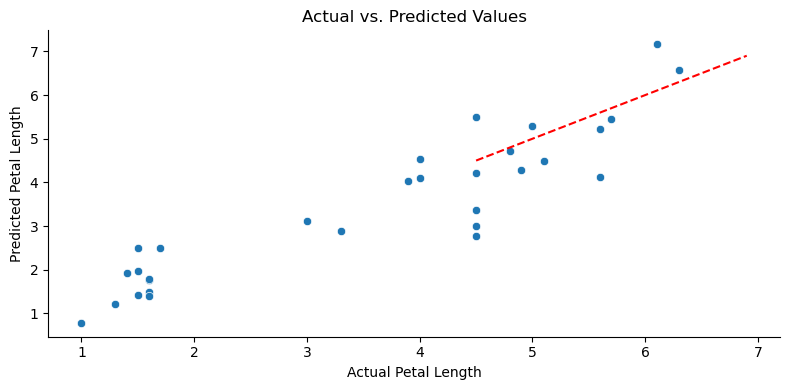

In [124]:
plt.figure(figsize=(8, 4))
sns.scatterplot(
    x=y_test, 
    y=y_pred
    )

plt.xlabel("Actual Petal Length")
plt.ylabel("Predicted Petal Length")
plt.title("Actual vs. Predicted Values")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  #prediction line


sns.despine()
plt.tight_layout()
plt.show()

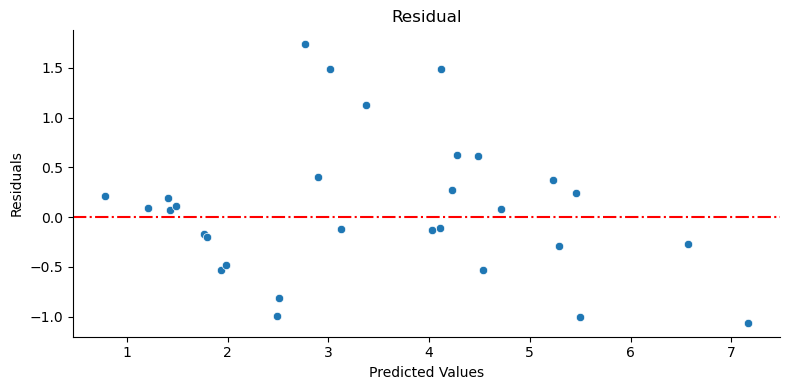

In [119]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 4))
sns.scatterplot(
    x=y_pred, 
    y=residuals
    )
plt.axhline(y=0, color='r', linestyle='-.')

plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual")


sns.despine()
plt.tight_layout()
plt.show()

In [109]:
for species in df['species'].unique():
    species_data = df[df['species'] == species]
    X = species_data[['sepal_length', 'sepal_width']]
    y = species_data['petal_length']
    
    model = LinearRegression().fit(X, y)
    print(f"\nRegression for {species}:")
    print("R-squared:", model.score(X, y))


Regression for setosa:
R-squared: 0.07183204228611262

Regression for versicolor:
R-squared: 0.6057506078304831

Regression for virginica:
R-squared: 0.7447548953125704


### Cluster Analysis (K-Means):

-   Preprocess Data

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Select features (exclude species label for unsupervised learning)
X = df.drop('species', axis=1)

# Standardize features (K-Means is sensitive to scale)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

-   Determine Optimal Number of Clusters (Elbow Method):

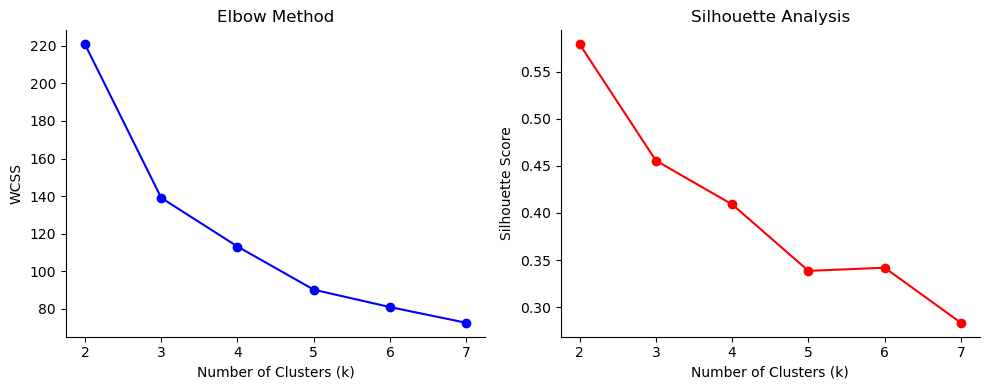

In [136]:
wcss = []  #within cluster sum of squares
silhouette_scores = []
k_range = range(2, 8)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot Elbow Curve
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(k_range, wcss, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method')


plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, 'ro-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')


sns.despine()
plt.tight_layout()
plt.show()

-   Apply K-Means with Optimal k

In [139]:
k = 3  #based on elbow/silhouette (matches true species count)
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add clusters to original DataFrame
df['cluster'] = clusters

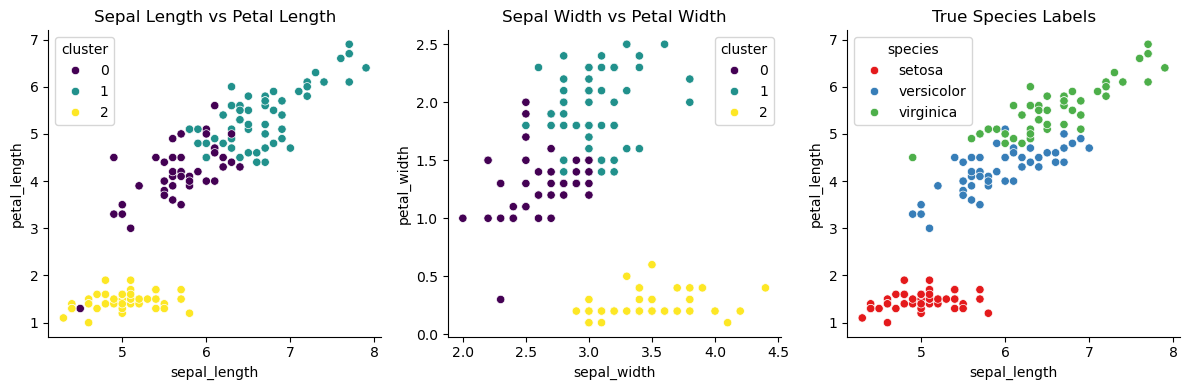

In [141]:
plt.figure(figsize=(12, 4))

# Sepal Length vs Petal Length
plt.subplot(1, 3, 1)
sns.scatterplot(
    data=df, 
    x='sepal_length', 
    y='petal_length', 
    hue='cluster', 
    palette='viridis'
    )

plt.title('Sepal Length vs Petal Length')

#Sepal Width vs Petal Width
plt.subplot(1, 3, 2)
sns.scatterplot(
    data=df, 
    x='sepal_width', 
    y='petal_width', 
    hue='cluster', 
    palette='viridis'
    )

plt.title('Sepal Width vs Petal Width')

# True Species Labels (for comparison)
plt.subplot(1, 3, 3)
sns.scatterplot(
    data=df, 
    x='sepal_length', 
    y='petal_length',
    hue='species', 
    palette='Set1'
    )

plt.title('True Species Labels')


sns.despine()
plt.tight_layout()
plt.show()